<a href="https://www.kaggle.com/code/andrey36912/notebook83cce240c5?scriptVersionId=195470110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exam-1/data.csv


Завдання 1
Дані
Дані про пацієнтів лікарні. Опис даних:

case_id: Ідентифікатор випадку, зареєстрованого в лікарні
Hospital_code: Унікальний код лікарні
Hospital_type_code: Унікальний код типу лікарні
City_Code_Hospital: Код міста, в якому знаходиться Лікарня
Hospital_region_code: Код країни, в якій знаходиться лікарня
country_code: Код області, в якій знаходиться лікарня
Available Extra Rooms in Hospital: Кількість додаткових палат, доступних у лікарні
Department: Відділення, в якому знаходиться пацієнт
Ward_Type: Код типу палати
Ward_Facility_Code: Код приміщення для палати
Bed Grade: Стан ліжка в палаті
patientid: Унікальний ідентифікатор пацієнта
doctorid: Унікальний ідентифікатор лікаря
City_Code_Patient: Код міста для пацієнта
Type of Admission: Тип госпіталізації, зареєстрований лікарнею
Severity of Illness: Тяжкість захворювання, зафіксована на момент госпіталізації
Visitors with Patient: Кількість відвідувачів з пацієнтом
Age: Вік пацієнта
Admission_Deposit: Депозит при госпіталізації
Stay: Дні перебування пацієнта в стаціонарі(цільова ознака)
Умова
Тип задачі

Модель повинна спрогнозувати кількість днів, які пацієнт провів у лікарні. Вам потрібно розв'язати цю задачу як задачу класифікації(спрогнозувати діапазон днів) або задачу регресії(спрогнозувати саму кількість днів), у випадку задачі регресії вам потрібно згенерувати нову цільову ознаку Stay_Days на основі Stay, як середнє значення діапазону.

При тренуванні моделей у вас може бути лише одина ознака Stay_Days чи Stay

Провести попередній аналіз даних

ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків
перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити
перевірити дані на наявність викидів, при необхідності створити нові дані без викидів
вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
чи видно викиди
скільки є піків
чи зміщенна гістограма вліво\вправо
вивести ящики з вусами для числових ознак, дати опис ящикам:
в якому діапазоні зосереджено 25%\50%\75%\100% даних
чи є викиди
чи зміщені ящики вліво\вправо
вивести гістограми з кількостями для категоріальних ознак
вивести групові ящики з вусами для числової та категоріальної ознаки, вказати від якої категоріальної ознаки залежить числова ознака і як саме
вивести точкові діаграми для числових ознак, вказати для яких числових ознак є залежність
Побудова моделі для задач класифікації та регресії

при необхідності згенерувати нові ознаки
самостійно обрати модель для тренування або обрати за допомогою optuna
розділити дані з викидами на тренувальні та тестові, можливо валідаційні якщо потрібно
вибрати метрики для оцінки якості моделі, вибір пояснити
побудувати препроцесор
натренувати модель
вивести метрики для тестових даних, дати оцінку якості моделі
зберегти натреновану модель

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/kaggle/input/exam-1/data.csv')
     

In [4]:
print(df.head())

   Unnamed: 0  case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0           0        1              8                  c                   3   
1           1        2              2                  c                   5   
2           2        3             10                  e                   1   
3           3        4             26                  b                   2   
4           4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  ...  patientid  City_Code_Patient  \

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         318438 non-null  int64  
 1   case_id                            318438 non-null  int64  
 2   Hospital_code                      318438 non-null  int64  
 3   Hospital_type_code                 318438 non-null  object 
 4   City_Code_Hospital                 318438 non-null  int64  
 5   Hospital_region_code               318438 non-null  object 
 6   Available Extra Rooms in Hospital  318438 non-null  int64  
 7   Department                         318438 non-null  object 
 8   Ward_Type                          318438 non-null  object 
 9   Ward_Facility_Code                 318438 non-null  object 
 10  Bed Grade                          318325 non-null  float64
 11  patientid                          3184

In [6]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Числові ознаки:", numerical_features)
print("Категоріальні ознаки:", categorical_features)

Числові ознаки: ['Unnamed: 0', 'case_id', 'Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit', 'doctorid', 'country_code']
Категоріальні ознаки: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                                0
case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               113
patientid                                 0
City_Code_Patient                      4532
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                      0
doctorid                             316012
country_code                              0
dtype: int64


In [8]:
for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].median())

for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])


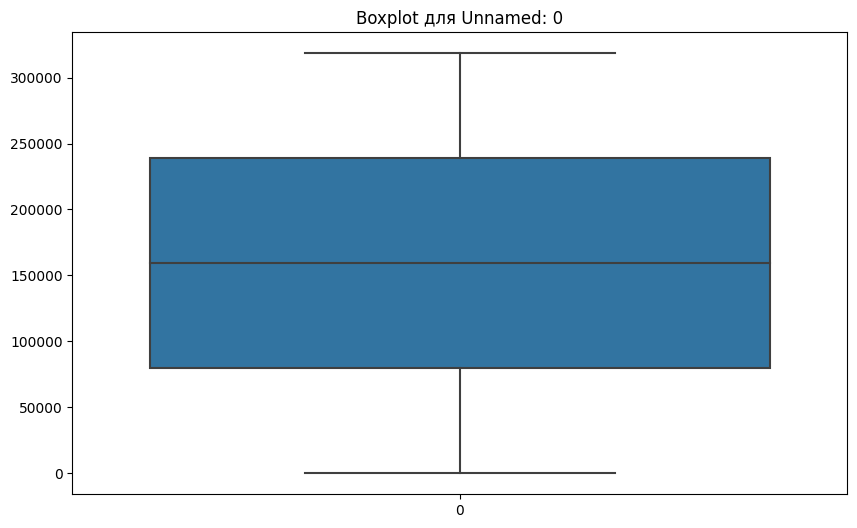

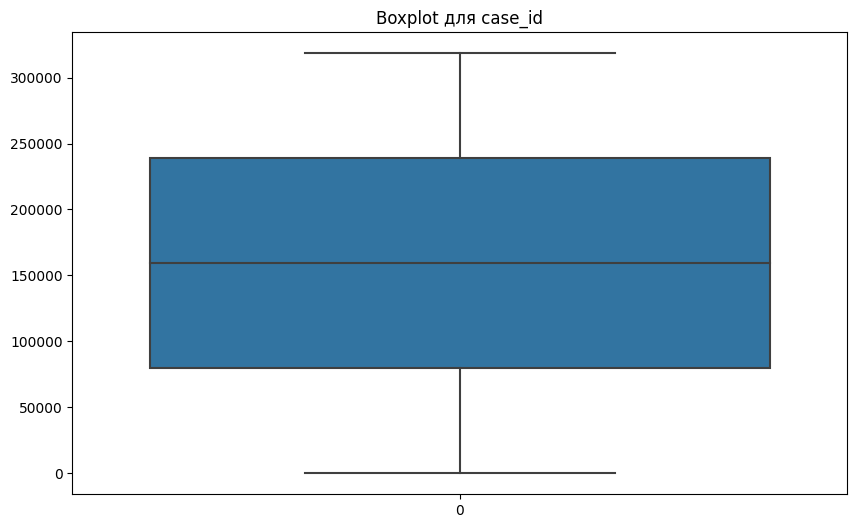

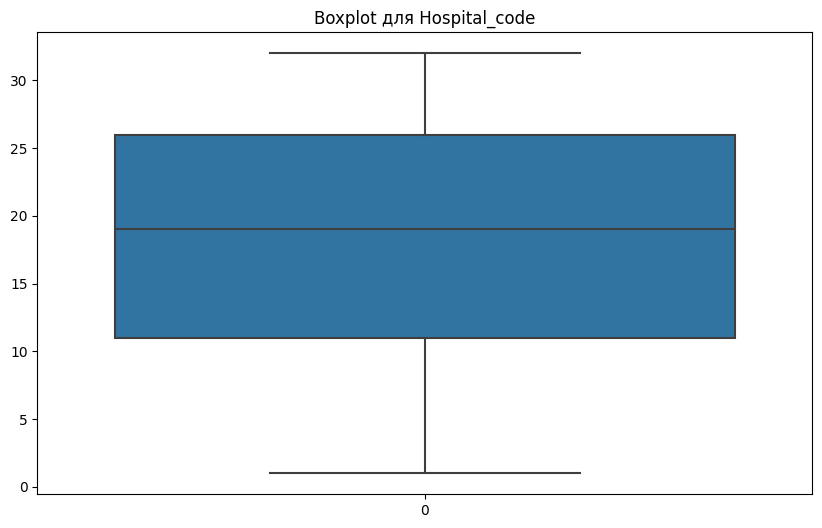

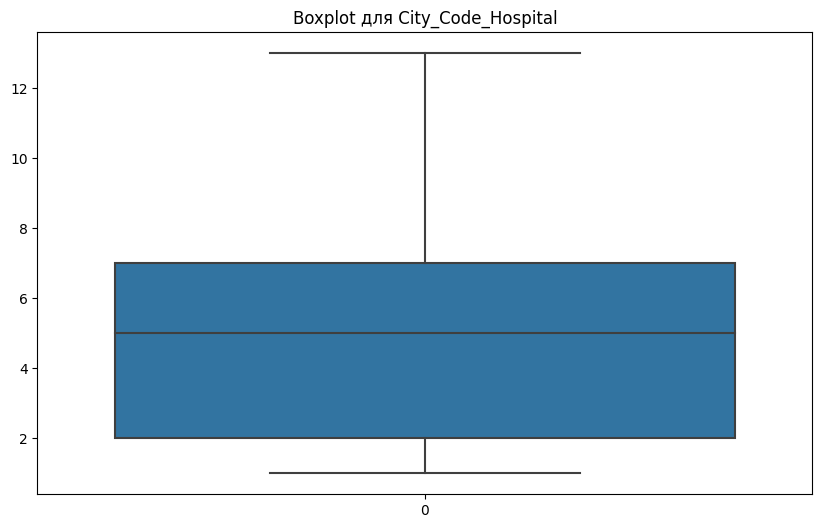

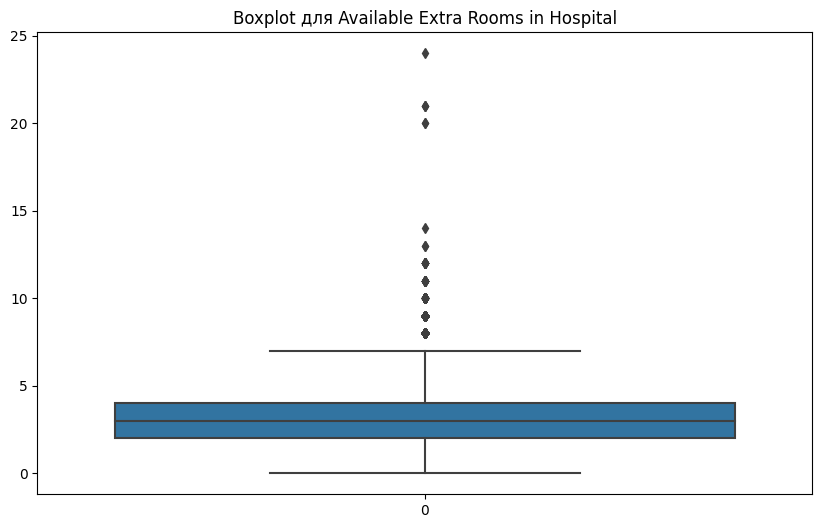

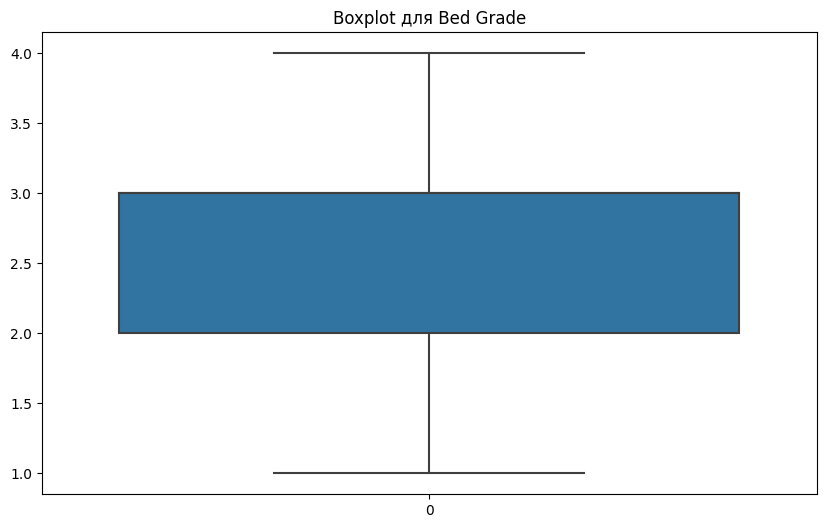

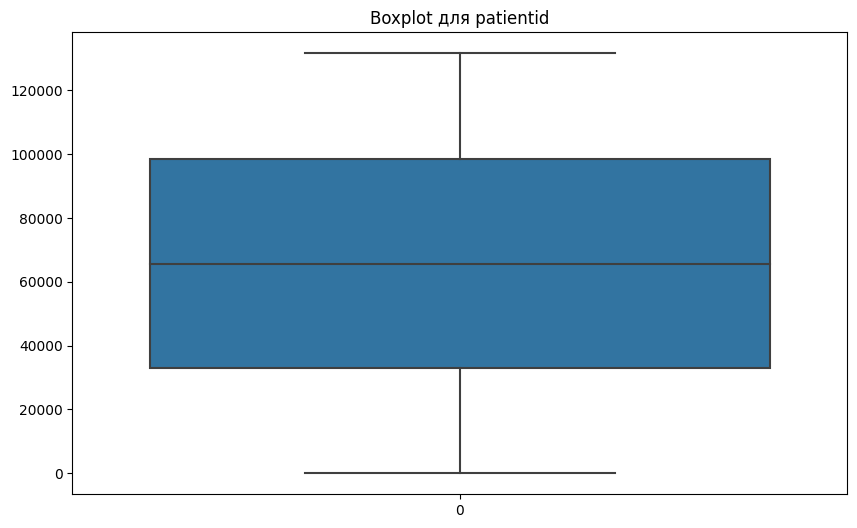

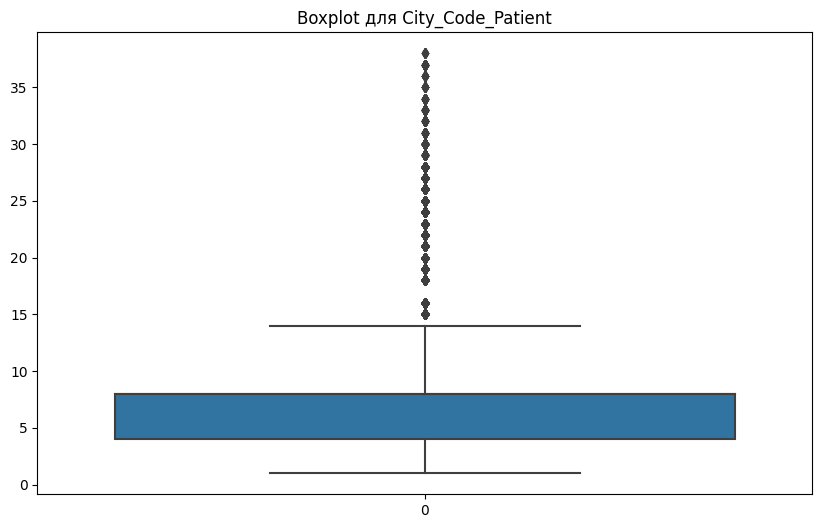

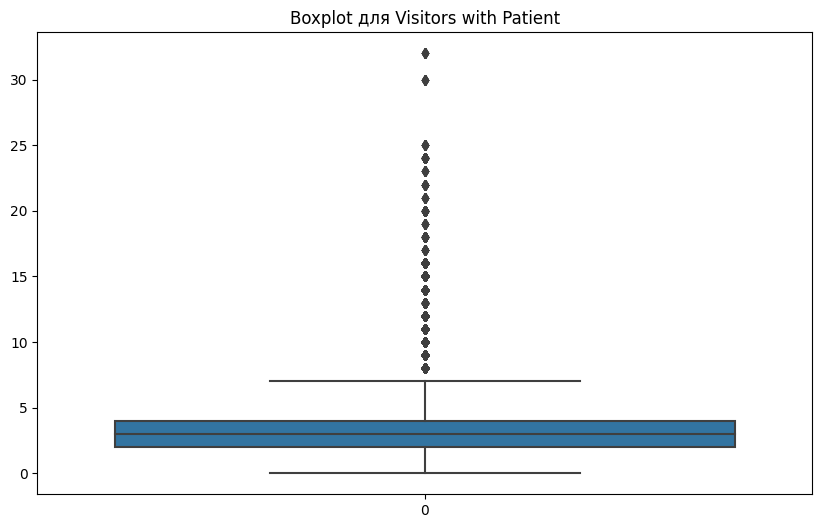

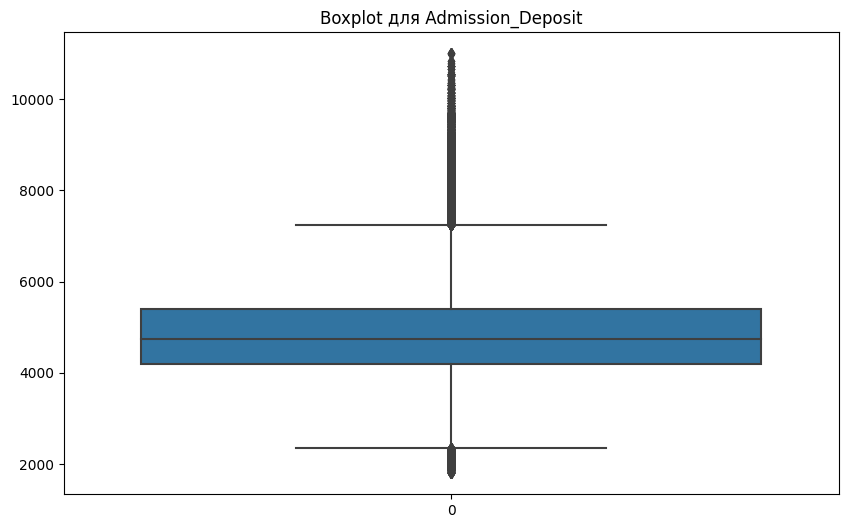

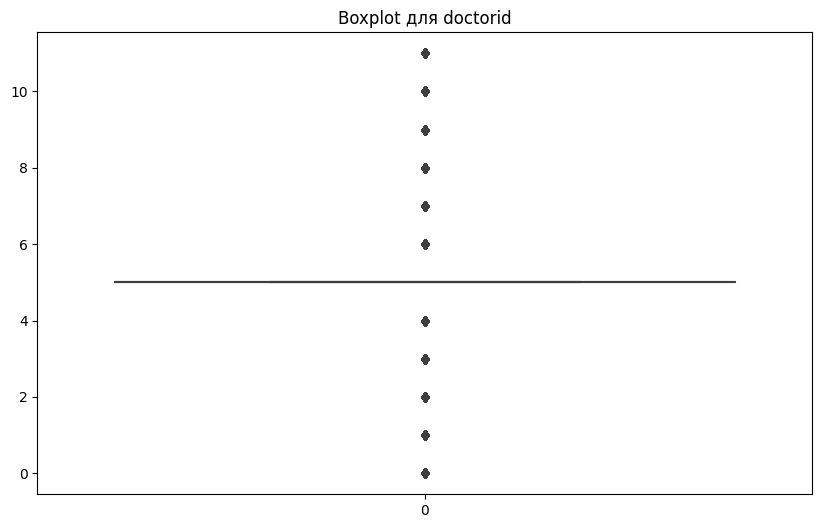

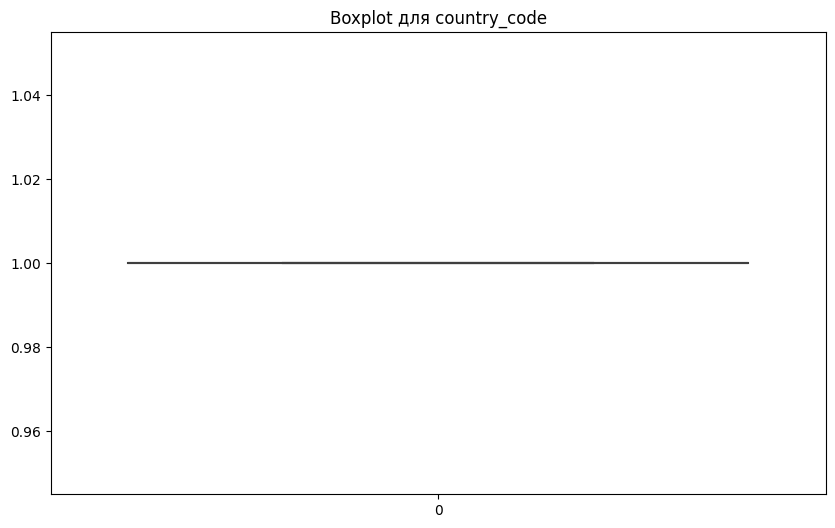

Розмір даних після видалення викидів: (270882, 21)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot для {feature}')
    plt.show()

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Розмір даних після видалення викидів:", df_cleaned.shape)


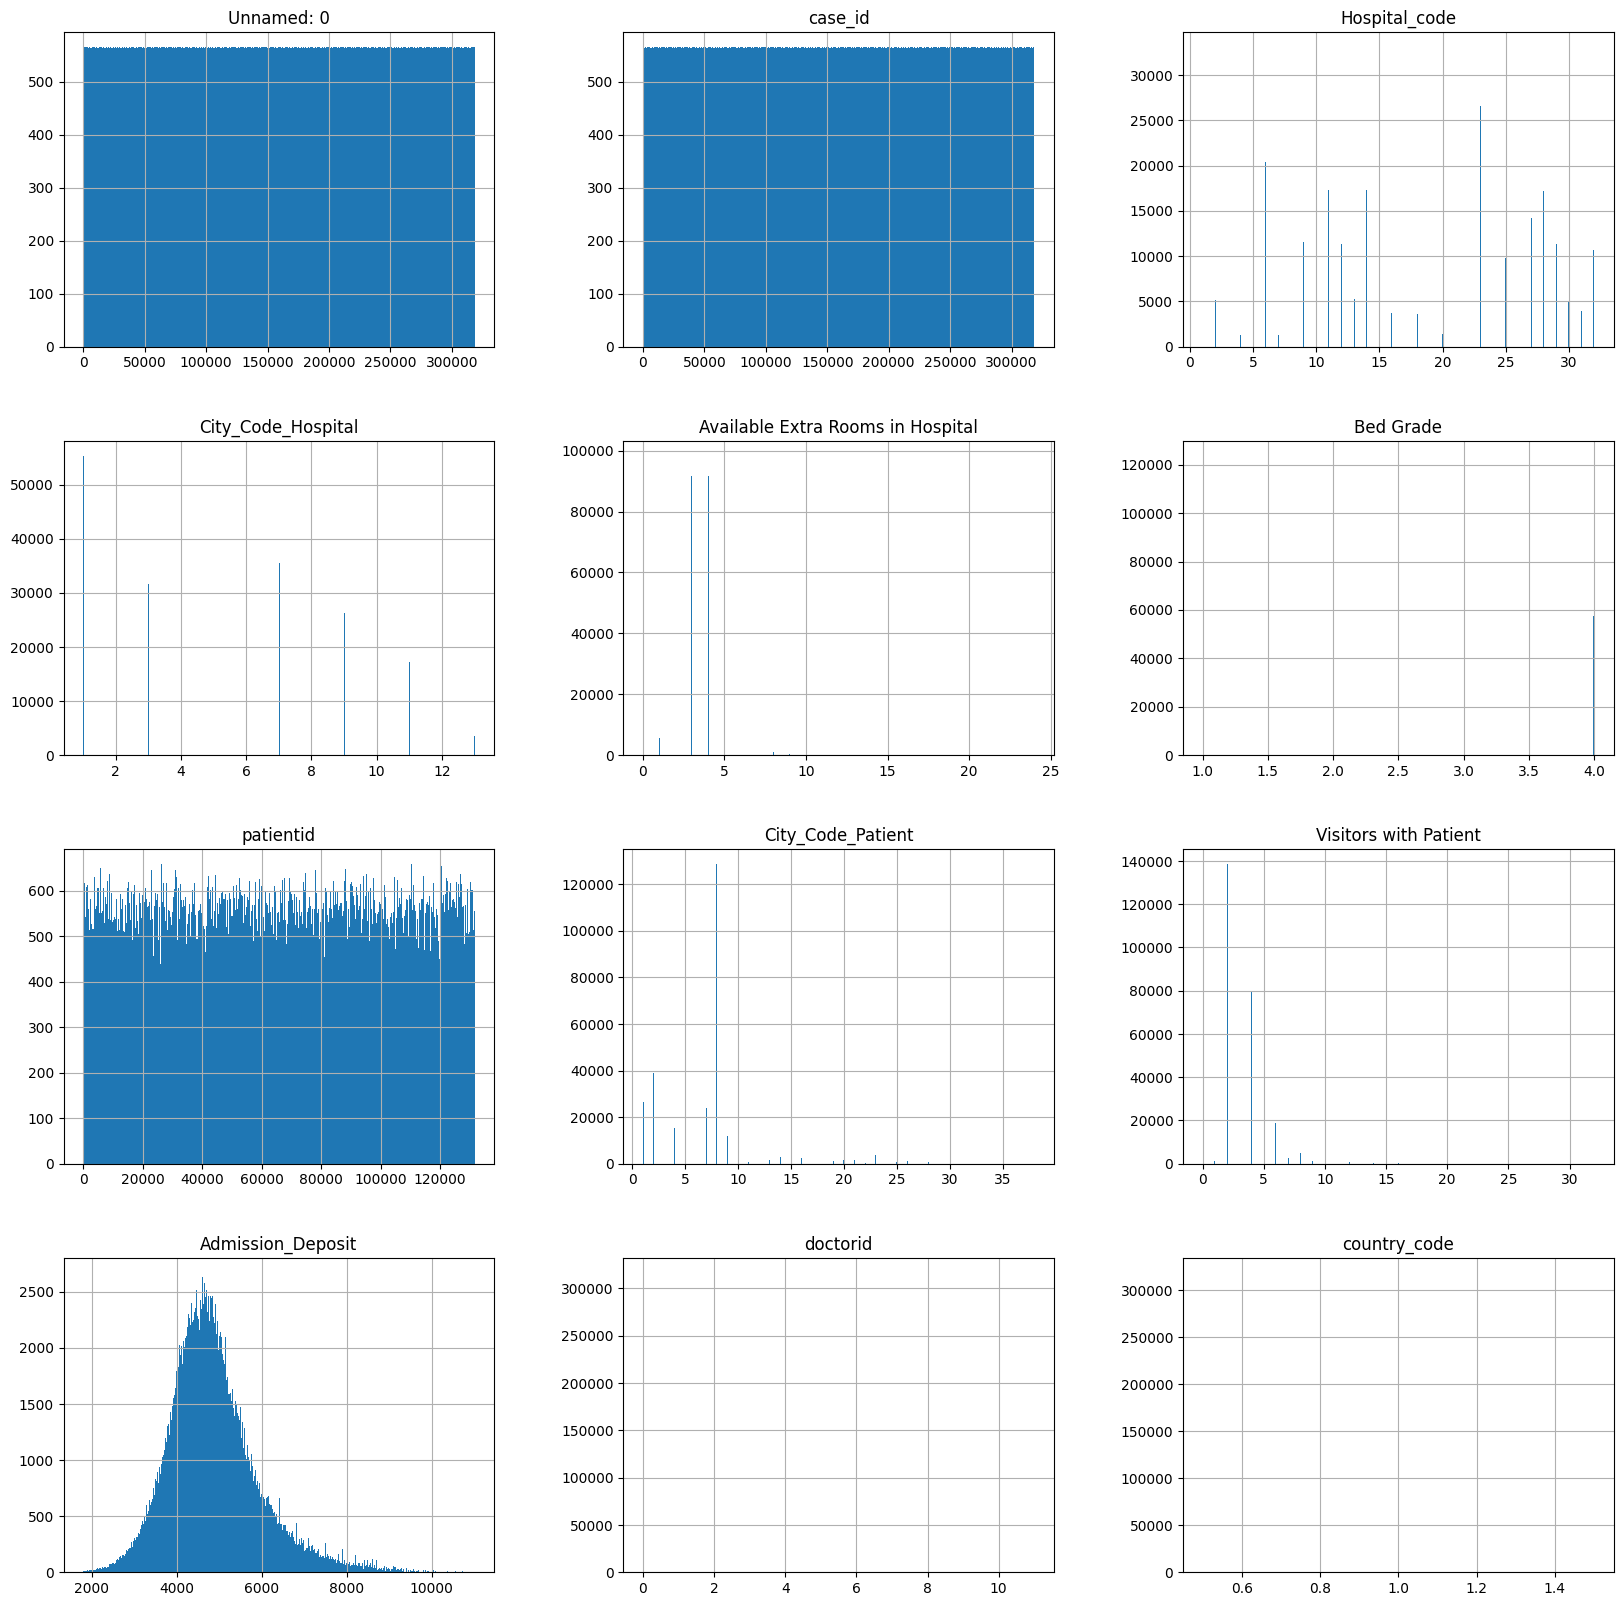

In [ ]:
import math


n_bins = int(math.sqrt(len(df)))

df[numerical_features].hist(bins=n_bins, figsize=(20, 20))
plt.show()

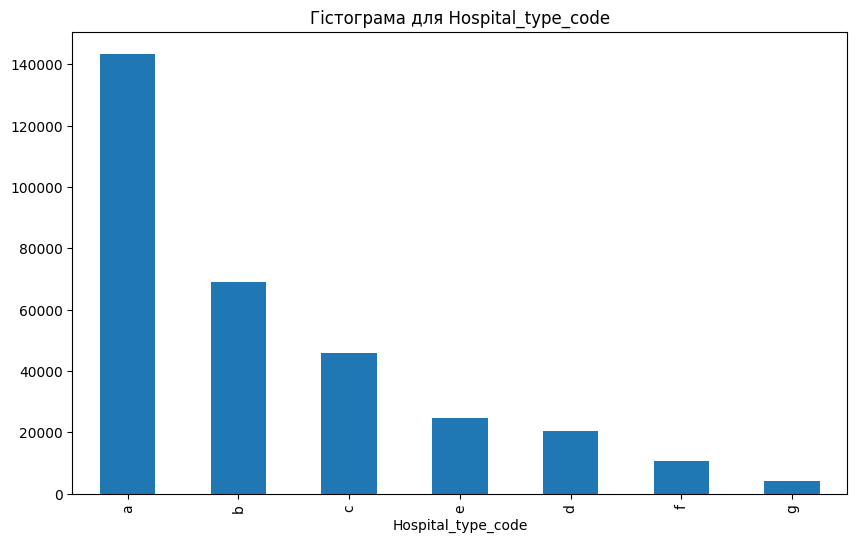

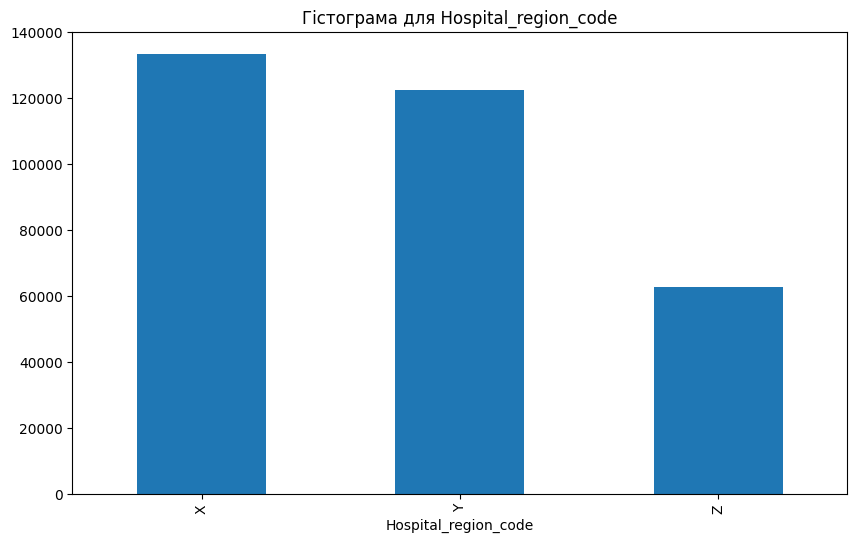

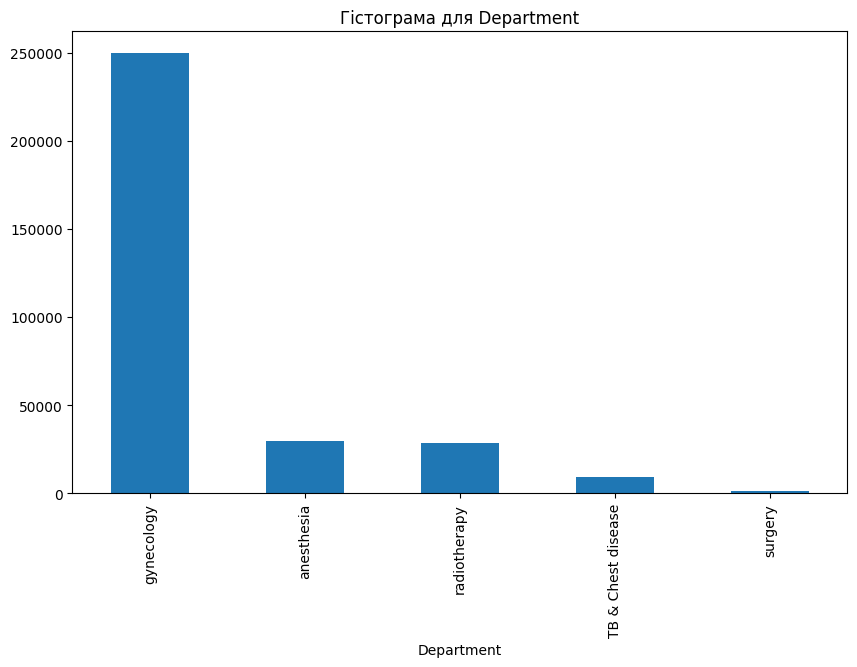

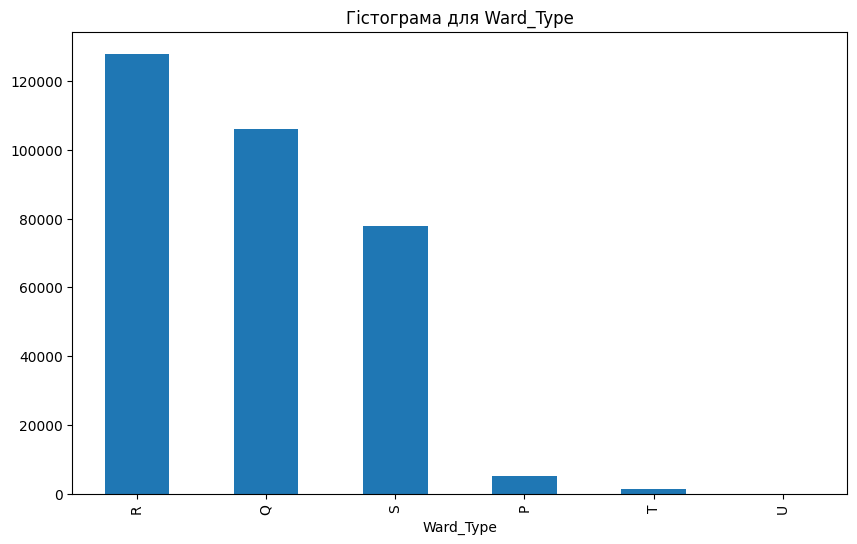

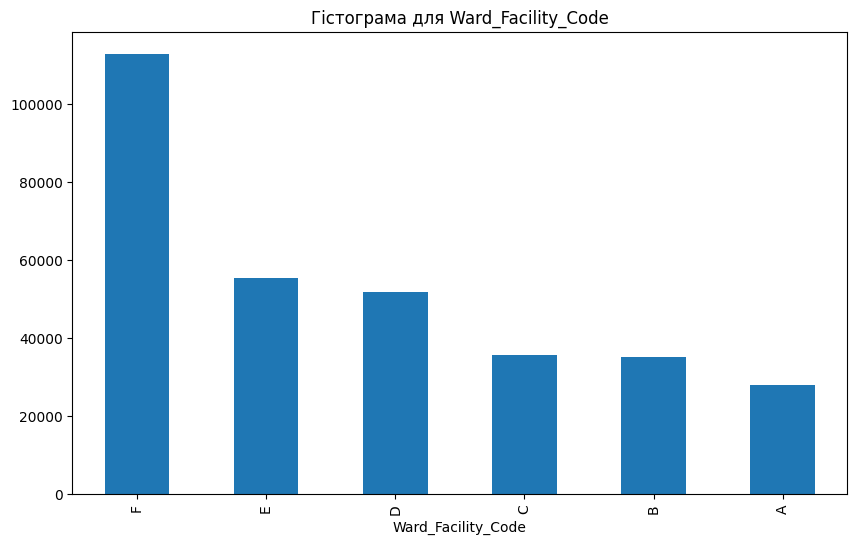

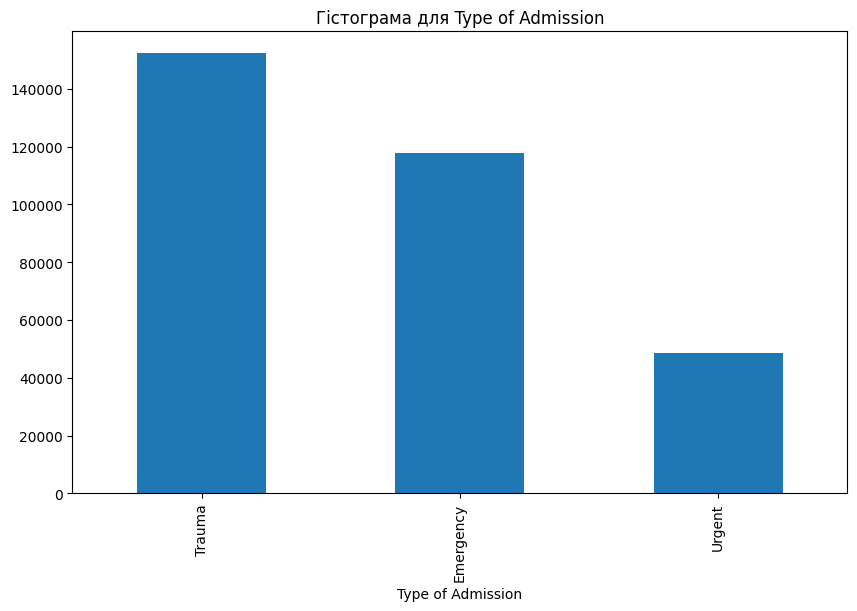

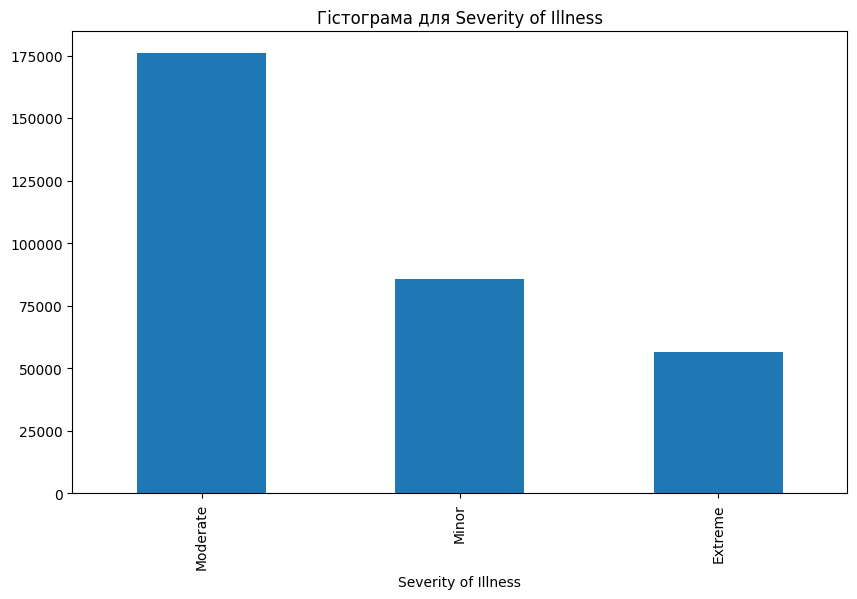

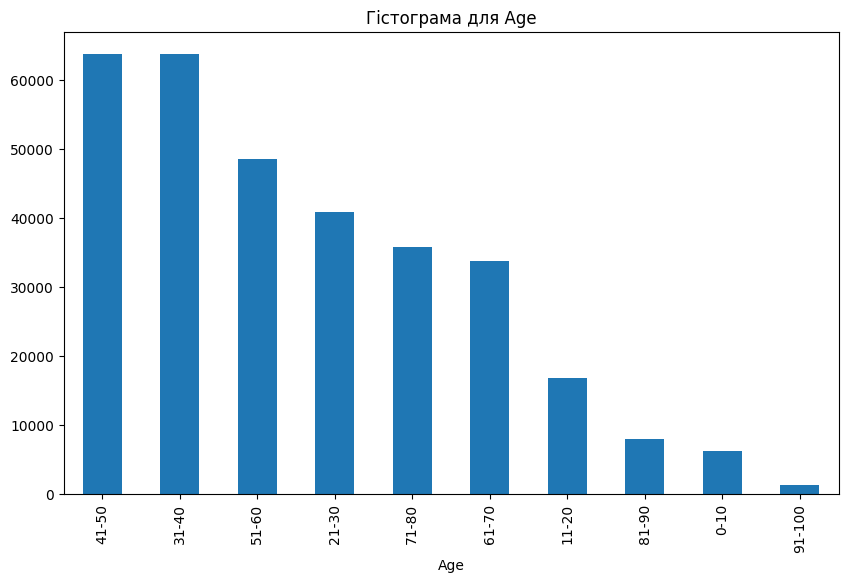

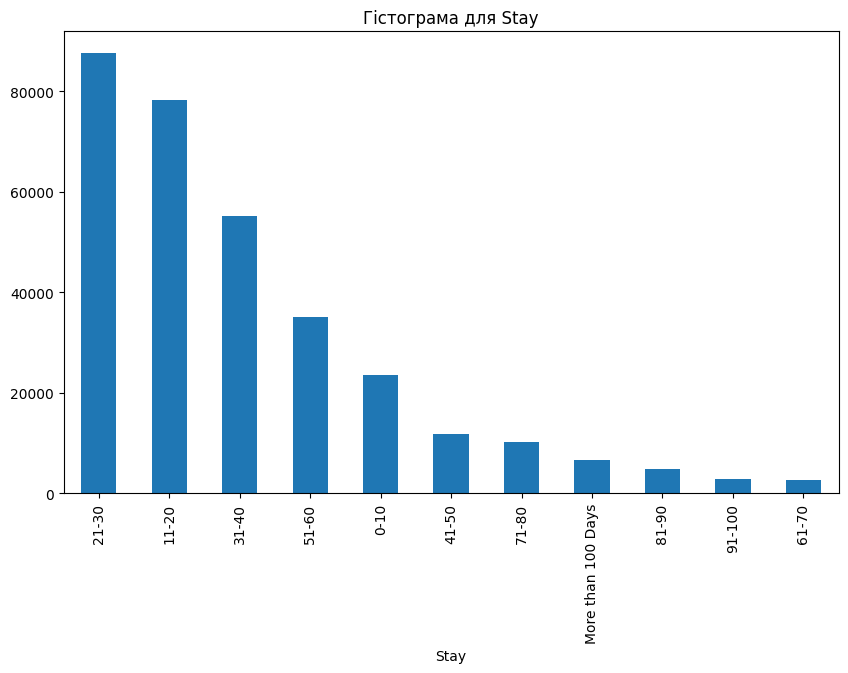

In [11]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Гістограма для {feature}')
    plt.show()


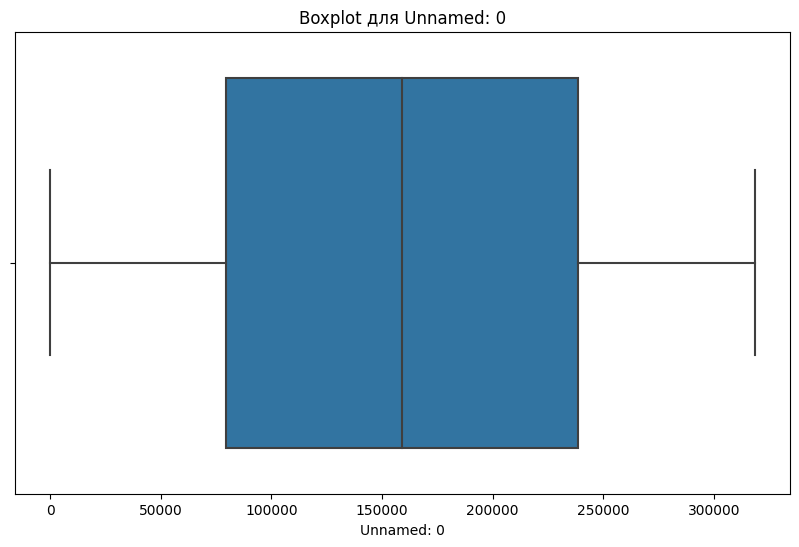

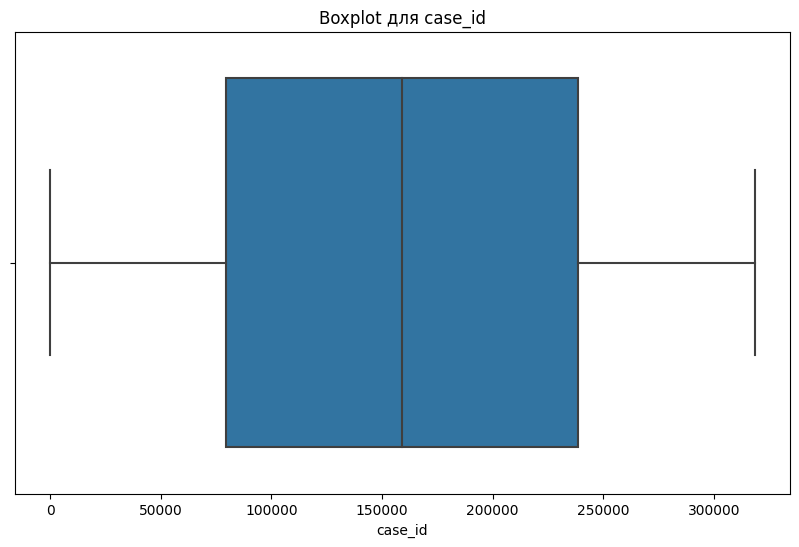

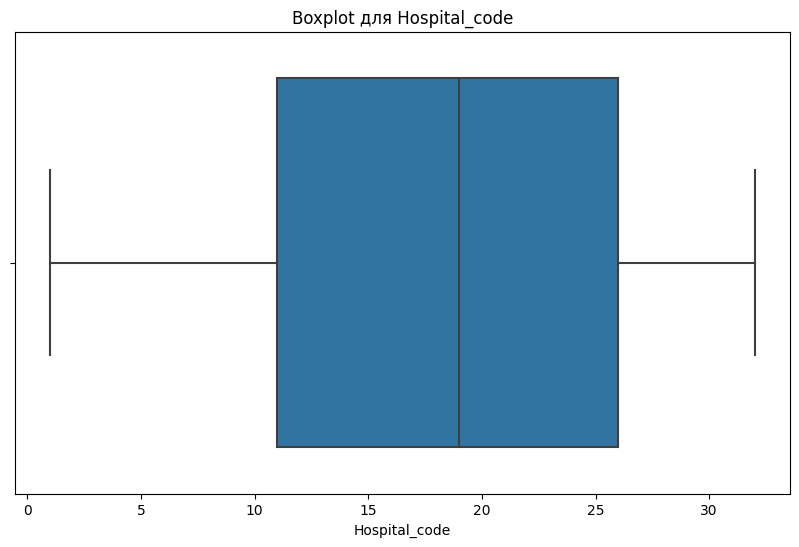

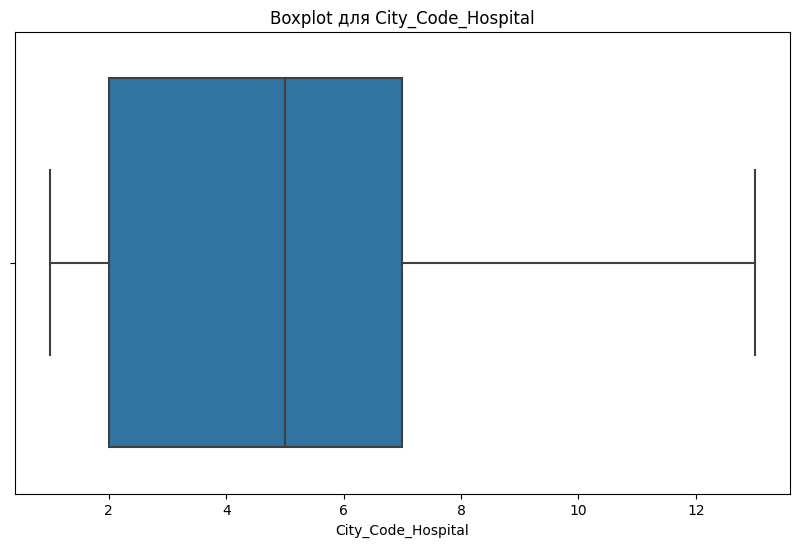

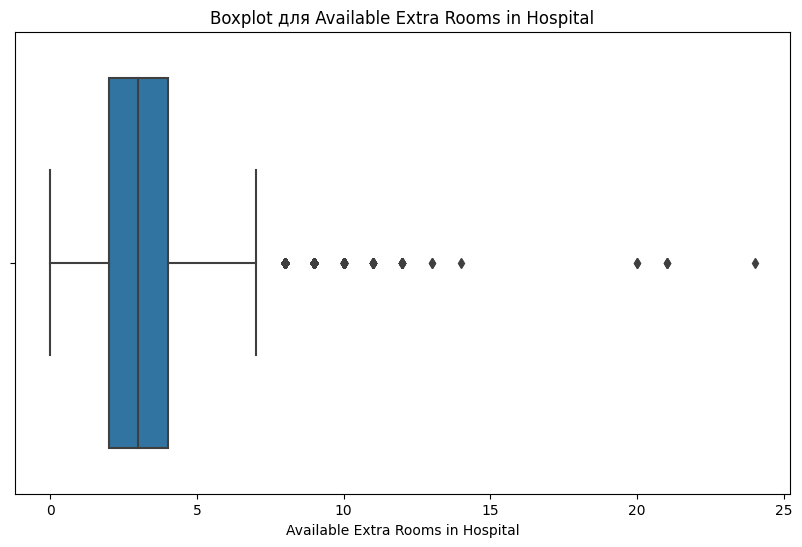

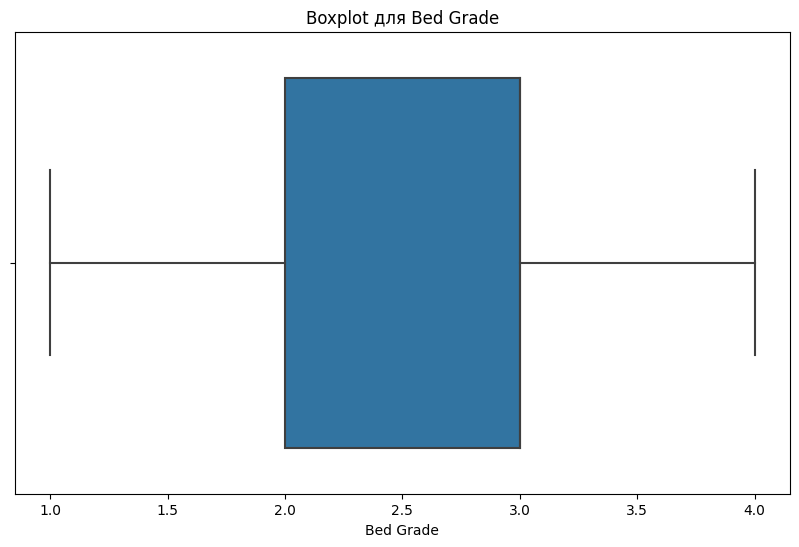

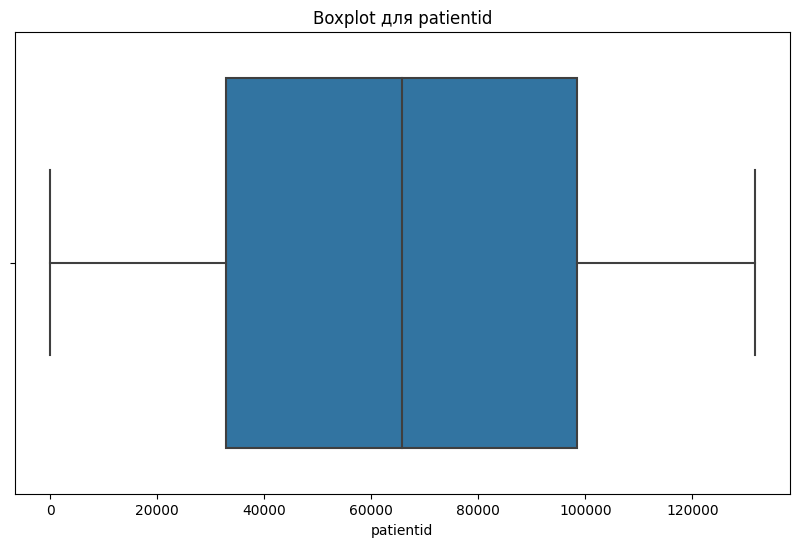

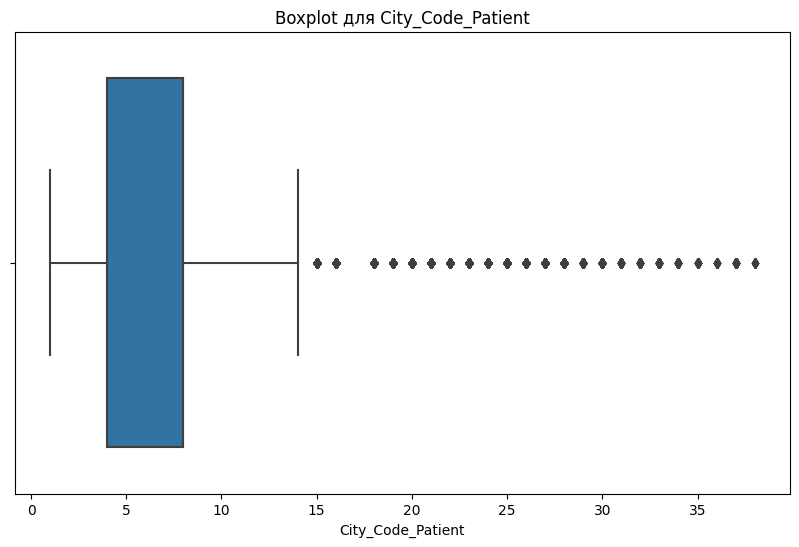

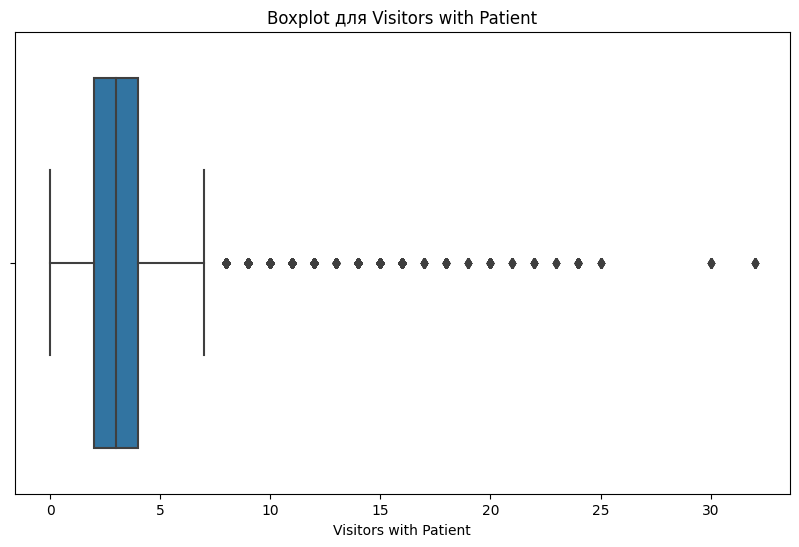

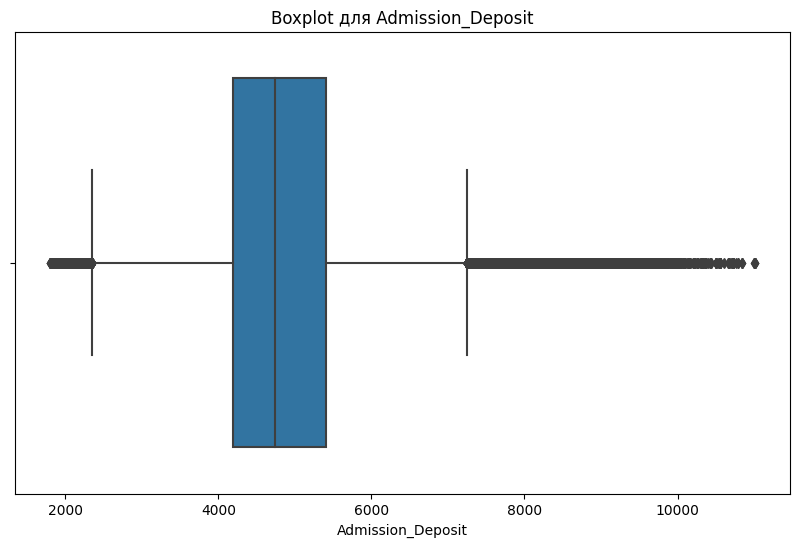

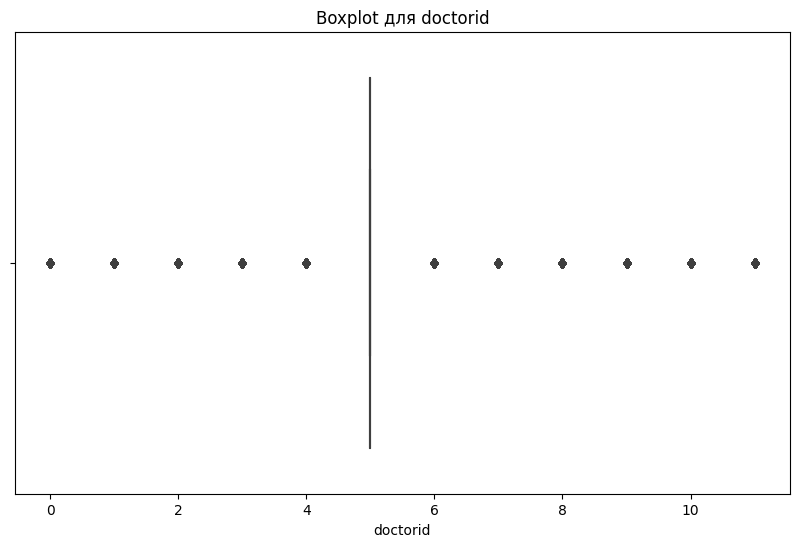

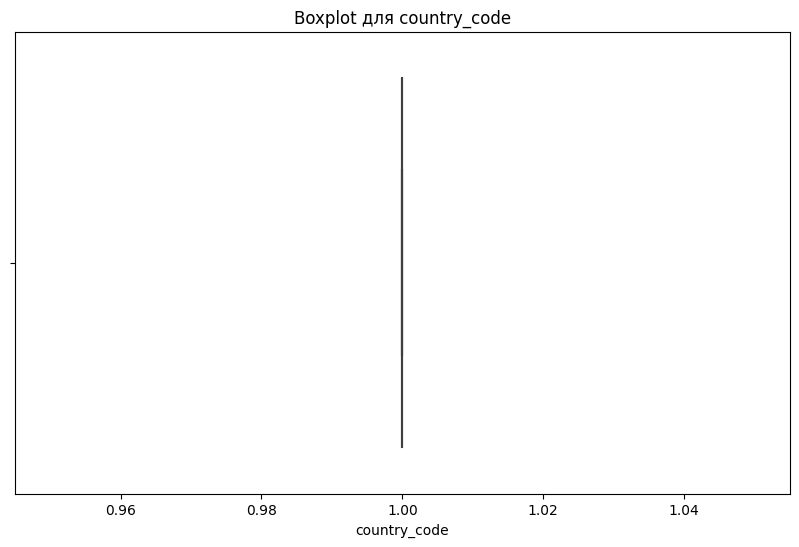

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot для {feature}')
    plt.show()

In [13]:

def calculate_mean_stay(stay):
    try:
        ranges = stay.split('-')
        # Якщо діапазон складається з двох чисел, розрахувати середнє
        if len(ranges) == 2:
            return (int(ranges[0]) + int(ranges[1])) / 2
        # Якщо значення не є діапазоном, обробити відповідно (наприклад, ">50" або "<1")
        elif stay.startswith('>'):
            return int(ranges[0].replace('>', ''))  # Для значень на кшталт '>50'
        elif stay.startswith('<'):
            return int(ranges[0].replace('<', ''))  # Для значень на кшталт '<1'
        else:
            return None  # Якщо значення не підпадає під жоден з форматів
    except Exception as e:
        print(f"Error processing stay value {stay}: {e}")
        return None

df['Stay_Days'] = df['Stay'].apply(calculate_mean_stay)


In [14]:
X = df.drop(columns=['Stay'])

In [15]:
y = df['Stay']
y_transformed = y.apply(convert_stay_to_days)

NameError: name 'convert_stay_to_days' is not defined

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

NameError: name 'y_transformed' is not defined

In [ ]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
 numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
# Функция для преобразования диапазонов в средние значения
def convert_stay_to_days(stay):
    if '-' in stay:
        # Разбиваем строку по дефису и находим среднее значение диапазона
        stay_range = stay.split('-')
        return (int(stay_range[0]) + int(stay_range[1])) / 2
    elif '>' in stay:
        # Если значение одно (например, '>50'), можно установить верхнюю границу, скажем 55
        return 55
    elif 'More than 100' in stay:
        # Обрабатываем случай, когда строка содержит 'More than 100 Days'
        return 100  # Можно использовать 100 или другое подходящее значение
    else:
        # Обрабатываем любые другие варианты
        return int(stay)




In [ ]:
model.fit(X_train, y_train)

In [ ]:
joblib.dump(model, 'hospital_stay_predictor.pkl')

In [ ]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))